In [3]:
import sklearn
import shap

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [4]:
X, y = shap.datasets.california(n_points=1000)
X100 = shap.utils.sample(X, 100)

In [5]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
14740,4.1518,22.0,5.663073,1.075472,1551.0,4.180593,32.58,-117.05
10101,5.7796,32.0,6.107226,0.927739,1296.0,3.020979,33.92,-117.97
20566,4.3487,29.0,5.930712,1.026217,1554.0,2.910112,38.65,-121.84
2670,2.4511,37.0,4.992958,1.316901,390.0,2.746479,33.20,-115.60
15709,5.0049,25.0,4.319261,1.039578,649.0,1.712401,37.79,-122.43


In [6]:
print(X.shape, X100.shape)

(1000, 8) (100, 8)


In [7]:
model = sklearn.linear_model.LinearRegression()
model.fit(X, y)

LinearRegression()

In [8]:
print("Model coefficients:\n")
for i in range(X.shape[1]):
    print(X.columns[i], "=", model.coef_[i].round(5))

Model coefficients:

MedInc = 0.42563
HouseAge = 0.01033
AveRooms = -0.1161
AveBedrms = 0.66385
Population = 3e-05
AveOccup = -0.26096
Latitude = -0.46734
Longitude = -0.46272


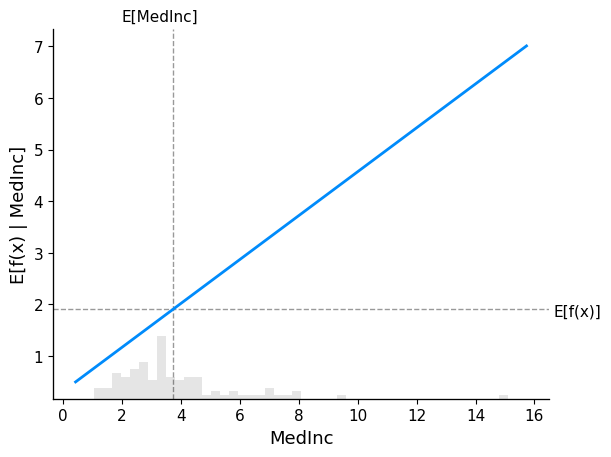

In [9]:
shap.partial_dependence_plot(
    "MedInc",
    model.predict,
    X100,
    ice=False,
    model_expected_value=True,
    feature_expected_value=True,
)

### Switch to https://www.kirenz.com/post/2022-06-17-explainable-ai-with-tensorflow-keras-and-shap/

In [10]:
import numpy as np
import pandas as pd

import tensorflow as tf
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

import shap

tf.__version__

'2.12.0'

In [11]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"
df = pd.read_csv(file_url)

In [12]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [13]:
y = df.pop('target')

In [14]:
list_numerical = ['age', 'thalach', 'trestbps',  'chol', 'oldpeak']

X = df[list_numerical]

In [15]:
X[:5]

,age,thalach,trestbps,chol,oldpeak
0,63,150,145,233,2.3
1,67,108,160,286,1.5
2,67,129,120,229,2.6
3,37,187,130,250,3.5
4,41,172,130,204,1.4


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(242, 5) (61, 5) (242,) (61,)


In [18]:
scaler = StandardScaler().fit(X_train[list_numerical]) 

X_train[list_numerical] = scaler.transform(X_train[list_numerical])
X_test[list_numerical] = scaler.transform(X_test[list_numerical])

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
  ])

model.compile(optimizer="adam", 
              loss ="binary_crossentropy", 
              metrics=["accuracy"])

model.fit(X_train, y_train, 
         epochs=15, 
         batch_size=13,
         validation_data=(X_test, y_test)
         )

Epoch 1/15


19/19 [==============================] - 1s 14ms/step - loss: 0.9199 - accuracy: 0.2893 - val_loss: 0.9276 - val_accuracy: 0.2623
Epoch 2/15
19/19 [==============================] - 0s 3ms/step - loss: 0.8283 - accuracy: 0.3223 - val_loss: 0.8401 - val_accuracy: 0.3115
Epoch 3/15
19/19 [==============================] - 0s 3ms/step - loss: 0.7599 - accuracy: 0.3802 - val_loss: 0.7751 - val_accuracy: 0.4426
Epoch 4/15
19/19 [==============================] - 0s 3ms/step - loss: 0.7077 - accuracy: 0.4628 - val_loss: 0.7285 - val_accuracy: 0.5082
Epoch 5/15
19/19 [==============================] - 0s 4ms/step - loss: 0.6699 - accuracy: 0.6157 - val_loss: 0.6925 - val_accuracy: 0.5246
Epoch 6/15
19/19 [==============================] - 0s 5ms/step - loss: 0.6414 - accuracy: 0.7107 - val_loss: 0.6637 - val_accuracy: 0.6721
Epoch 7/15
19/19 [==============================] - 0s 3ms/step - loss: 0.6173 - accuracy: 0.7645 - val_loss: 0.6424 - val_accuracy: 0.6885
Epoch 8/15
19/19 [============

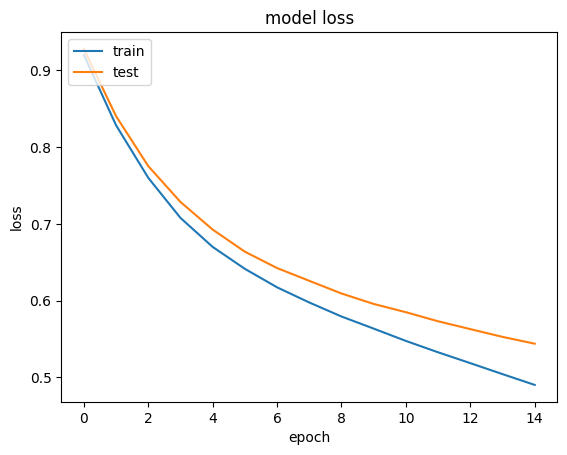

In [20]:
# print graph of training history
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [21]:
loss, accuracy = model.evaluate(X_test, y_test)

print("Accuracy", accuracy)

2/2 [==============================] - 0s 4ms/step - loss: 0.5440 - accuracy: 0.7705
Accuracy 0.7704917788505554


In [22]:
model.save('classifier_hd')

INFO:tensorflow:Assets written to: classifier_hd\assets


INFO:tensorflow:Assets written to: classifier_hd\assets


In [23]:
reloaded_model = tf.keras.models.load_model('classifier_hd')

In [24]:
predictions = reloaded_model.predict(X_train)

8/8 [==============================] - 0s 1ms/step


In [25]:
print(predictions[:5])

[[0.28993464]
 [0.17188182]
 [0.22291103]
 [0.6134681 ]
 [0.19461833]]


In [26]:
print(
    "This particular patient had a %.1f percent probability "
    "of having a heart disease, as evaluated by our model." % (100 * predictions[0][0],)
)

This particular patient had a 29.0 percent probability of having a heart disease, as evaluated by our model.


In [27]:
explainer = shap.KernelExplainer(model, X_train.iloc[:,:])

In [39]:
shap_values = explainer.shap_values(X_train.iloc[20,:])

InvalidArgumentError: {{function_node __wrapped__MatMul_device_/job:localhost/replica:0/task:0/device:CPU:0}} In[0] and In[1] has different ndims: [4,30] vs. [30] [Op:MatMul]

### Alternative approach: https://shap.readthedocs.io/en/latest/example_notebooks/tabular_examples/neural_networks/Census%20income%20classification%20with%20Keras.html

In [42]:
from keras.layers import (
    Dense,
    Dropout,
    Flatten,
    Embedding,
    Input,
    concatenate,
)

from keras.models import Model
from sklearn.model_selection import train_test_split

In [50]:
X, y = shap.datasets.adult()
X_display, y_display = shap.datasets.adult(display=True)

# normalize data (this is important for model convergence)
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
for k, dtype in dtypes:
    if dtype == "float32":
        X[k] -= X[k].mean()
        X[k] /= X[k].std()

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=7
)

AttributeError: 'float' object has no attribute 'strip'